<a href="https://colab.research.google.com/github/luicast/celsius_fahrenheit/blob/main/convertidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np


In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [12]:
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [13]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [14]:
print("comenzando entrenamiento...")
historial =  modelo.fit(celsius, fahrenheit, epochs=600, verbose=False)
print("modelo entrenado")

comenzando entrenamiento...
modelo entrenado


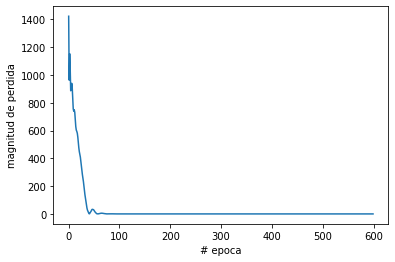

In [15]:
import matplotlib.pyplot as plt
plt.xlabel("# epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

In [16]:
print("hagamos una prediccion")
resultado = modelo.predict([100.0])
print(f"el resultado es {resultado} en fahrenheit")

hagamos una prediccion
el resultado es [[211.74745]] en fahrenheit


In [18]:
print("valores internos del modelo")
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

valores internos del modelo
[array([[ 0.38257685,  0.2987537 , -0.4401512 ]], dtype=float32), array([ 3.9467397,  1.5385022, -3.981202 ], dtype=float32)]
[array([[ 1.2003316 ,  0.4579318 , -0.27884144],
       [ 0.4888115 ,  0.49256775,  0.49198514],
       [-0.6491977 ,  0.662725  ,  0.89328575]], dtype=float32), array([ 3.9607518,  0.520044 , -4.0575247], dtype=float32)]
[array([[ 1.5397307 ],
       [ 0.09902678],
       [-1.1987642 ]], dtype=float32), array([3.8388455], dtype=float32)]
